In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = os.path.join('datasets','titanic','Titanic-Dataset.csv')
dataset=pd.read_csv(file_path)
print(dataset.shape)
dataset.info()
dataset.head()


(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex  

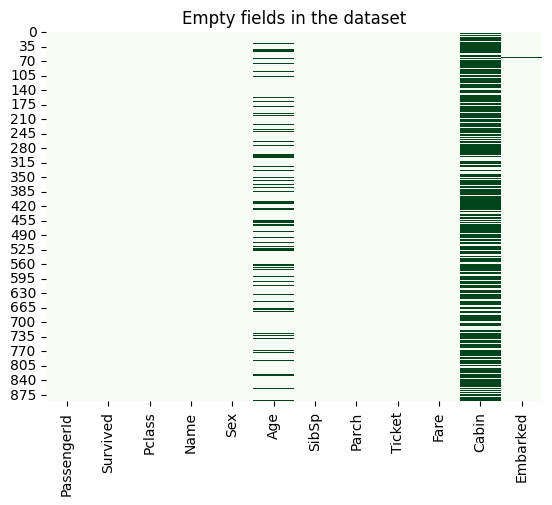

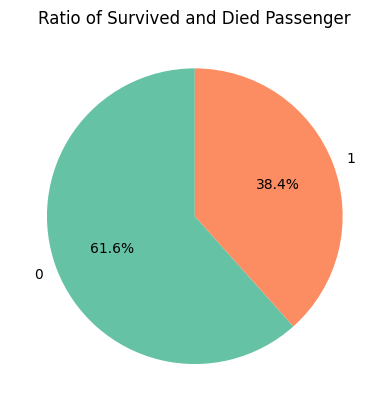

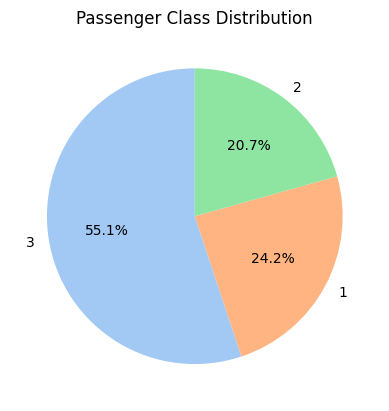

In [74]:
print(dataset.describe())
print(dataset.isnull().sum())  # count of NaN values for each column in the DataFrame
# Graphical display for NaN values in each column
sns.heatmap(dataset.isnull(),cmap='Greens',cbar=False)
plt.title('Empty fields in the dataset')
plt.show()
# Visualization of Survived passengers
sns.set_palette('Set2')
plt.pie(dataset['Survived'].value_counts(), labels=dataset['Survived'].value_counts().index, autopct='%1.1f%%',startangle=90)
plt.title('Ratio of Survived and Died Passenger')
plt.show()
# Visualization of Passenger class (1=1st class; 2=2nd class; 3=3rd class)
sns.set_palette('pastel')
plt.pie(dataset['Pclass'].value_counts(), labels=dataset['Pclass'].value_counts().index, autopct='%1.1f%%',startangle=90)
plt.title('Passenger Class Distribution')
plt.show()
# print(dataset['SibSp'].value_counts())
# # sns.boxplot(data=dataset,x='Survived',y='Age',hue='Survived')


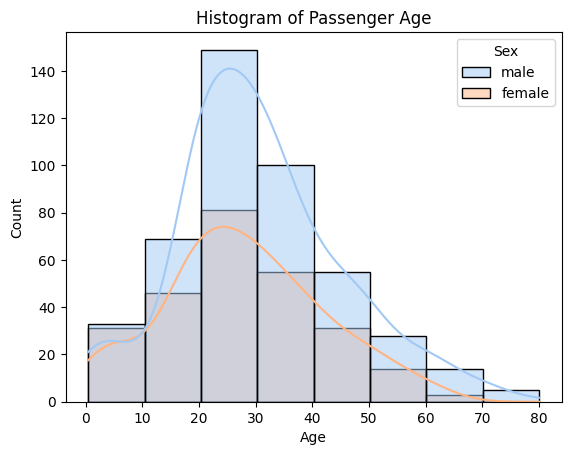

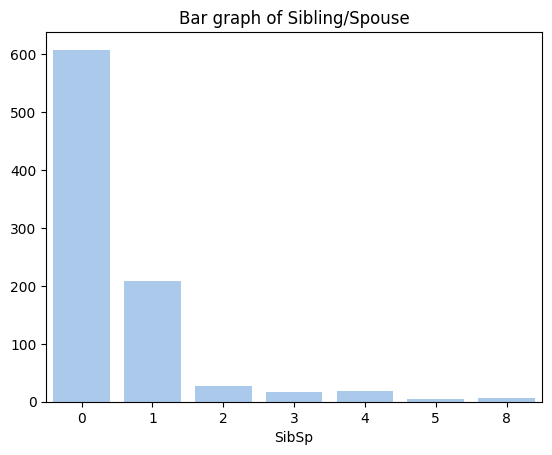

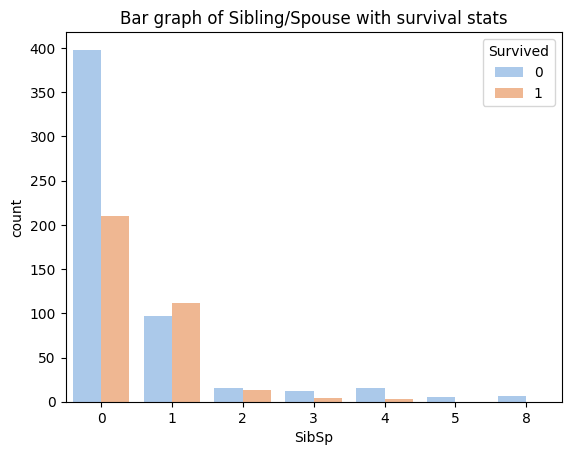

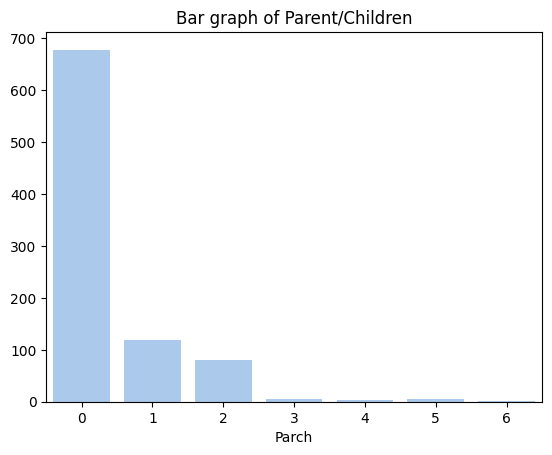

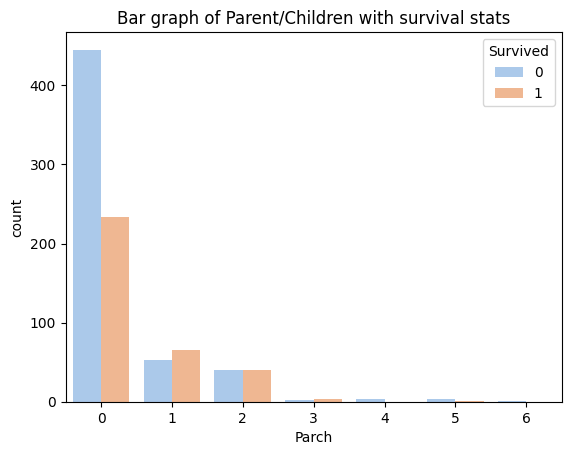

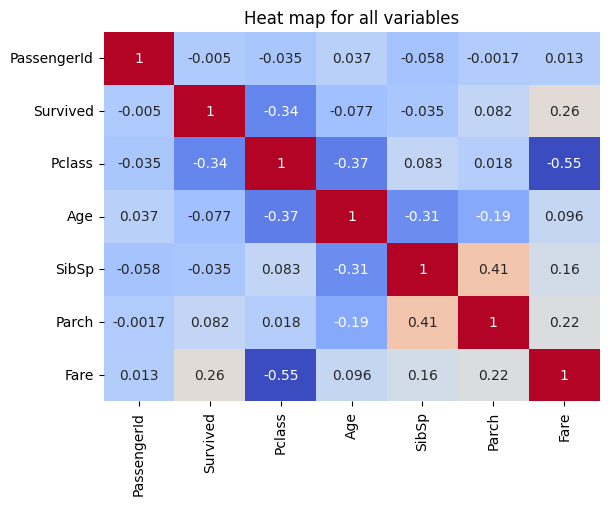

In [83]:

# Histogram for age based on sex of passenger
# sns.histplot(dataset['Age'].dropna(),bins=8, kde=True)    # this will show the histgram of age for all passenger 
sns.histplot(dataset.dropna(subset=['Age']), x='Age', hue='Sex', bins=8,kde=True)
plt.title('Histogram of Passenger Age')
plt.show()

# Bar plot to show the number of sibling/spouse
sns.barplot(x=dataset['SibSp'].value_counts().index, y=dataset['SibSp'].value_counts().values)
plt.title('Bar graph of Sibling/Spouse')
plt.show()

#
grouped=dataset.groupby(['SibSp', 'Survived']).size().reset_index(name='count')
sns.barplot(x='SibSp',y='count', hue='Survived', data=grouped) 
plt.title('Bar graph of Sibling/Spouse with survival stats')
plt.show()

# Bar plot to show the number of sibling/spouse
sns.barplot(x=dataset['Parch'].value_counts().index, y=dataset['Parch'].value_counts().values)
plt.title('Bar graph of Parent/Children')
plt.show()

#
grouped2=dataset.groupby(['Parch', 'Survived']).size().reset_index(name='count')
sns.barplot(x='Parch',y='count', hue='Survived', data=grouped2) 
plt.title('Bar graph of Parent/Children with survival stats')
plt.show()

colors_numerically = dataset.select_dtypes(include=['number'])
sns.heatmap(colors_numerically.corr(),cmap='coolwarm',cbar=False,annot=True)
plt.title('Heat map for all variables')
plt.show()